<a href="https://colab.research.google.com/github/vidooshis/Navigating-mazes/blob/main/navigating_mazes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported.
Maze class defined.


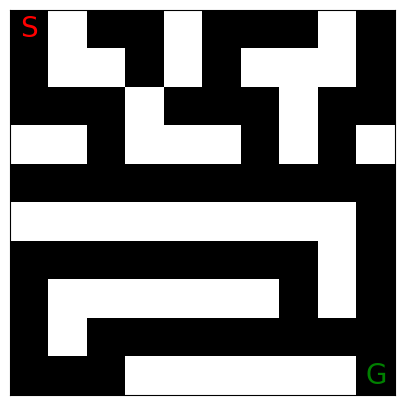

QLearningAgent class defined.
finish_episode function defined.


In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import time

print("Libraries imported.")

# Maze Class
class Maze:
    def __init__(self, maze, start_position, goal_position):
        self.maze = maze
        self.maze_height = maze.shape[0]
        self.maze_width = maze.shape[1]
        self.start_position = start_position
        self.goal_position = goal_position

    def show_maze(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.maze, cmap='gray')
        plt.text(self.start_position[1], self.start_position[0], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[1], self.goal_position[0], 'G', ha='center', va='center', color='green', fontsize=20)
        plt.xticks([]), plt.yticks([])
        plt.show()

print("Maze class defined.")

# Define complex maze layout
maze_layout = np.array([
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
])

maze = Maze(maze_layout, (0, 0), (9, 9))
maze.show_maze()

# Define actions
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

# QLearningAgent Class
class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_start = exploration_start
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        return self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)

    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4)
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.q_table[next_state])
        current_q_value = self.q_table[state][action]
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)
        self.q_table[state][action] = new_q_value

print("QLearningAgent class defined.")

# Rewards
goal_reward = 100
wall_penalty = -10
step_penalty = -1

# Simulation function for one episode (stopping at the goal)
def finish_episode(agent, maze, current_episode, train=True):
    current_state = maze.start_position
    is_done = False
    path = [current_state]

    while not is_done:
        action = agent.get_action(current_state, current_episode)
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        if (next_state[0] < 0 or next_state[0] >= maze.maze_height or
            next_state[1] < 0 or next_state[1] >= maze.maze_width or
            maze.maze[next_state[0]][next_state[1]] == 1):
            reward = wall_penalty
            next_state = current_state
        elif next_state == maze.goal_position:
            reward = goal_reward
            is_done = True
        else:
            reward = step_penalty

        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        path.append(next_state)
        current_state = next_state

    return path

print("finish_episode function defined.")

# Animation Function (stopping at the goal)
def animate_path(agent, maze, num_episodes=1):
    path = finish_episode(agent, maze, num_episodes, train=False)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze.maze, cmap='gray')
    ax.text(maze.start_position[1], maze.start_position[0], 'S', ha='center', va='center', color='red', fontsize=20)
    ax.text(maze.goal_position[1], maze.goal_position[0], 'G', ha='center', va='center', color='green', fontsize=20)
    path_line, = ax.plot([], [], marker="o", color="blue", markersize=10)

    def update(frame):
        path_line.set_data([p[1] for p in path[:frame+1]], [p[0] for p in path[:frame+1]])
        return path_line,

    anim = animation.FuncAnimation(fig, update, frames=len(path), interval=500, blit=True)
    plt.xticks([]), plt.yticks([])
    plt.close()

    return anim

# Initialize and train agent
agent = QLearningAgent(maze)
for episode in range(100):  # Train agent for 100 episodes
    finish_episode(agent, maze, episode, train=True)

# Display animation of agent's learned path
anim = animate_path(agent, maze)
from IPython.display import HTML
HTML(anim.to_jshtml())